# 機器學習流程
# 1.讀取資料
# 2.數據清洗
# 3.特徵工程
# 4.相關性分析
# 5.訓練模型

# 1.讀取資料

In [42]:
# 環境準備，使用 Python NumPy、Pandas、seaborn
import pandas as pd
import numpy as np
import seaborn as sb

In [43]:
# train資料來源
df_train_url = 'https://raw.githubusercontent.com/micrighost/KaggleNotes_BostonHousePrices_ANN/main/boston_raw_data/Boston_train.csv'

df_train = pd.read_csv(df_train_url)

df_train.head(10)

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS?,RAD,TAX,PTRATIO,B 1000,LSTAT,PRICE
0,400,9.91655,0.0,18.10,0,0.693,5.852,77.8,1.5004,24,666,20.2,338.16,29.97,6.3
1,490,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0
2,491,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1
3,398,7.67202,0.0,18.10,0,0.693,5.747,98.9,1.6334,24,666,20.2,393.10,19.92,8.5
4,430,9.33889,0.0,18.10,0,0.679,6.380,95.6,1.9682,24,666,20.2,60.72,24.08,9.5
5,429,7.36711,0.0,18.10,0,0.679,6.193,78.1,1.9356,24,666,20.2,96.73,21.52,11.0
6,383,9.18702,0.0,18.10,0,0.700,5.536,100.0,1.5804,24,666,20.2,396.90,23.60,11.3
7,390,8.15174,0.0,18.10,0,0.700,5.390,98.9,1.7281,24,666,20.2,396.90,20.85,11.5
8,425,8.79212,0.0,18.10,0,0.584,5.565,70.6,2.0635,24,666,20.2,3.65,17.16,11.7
9,145,2.77974,0.0,19.58,0,0.871,4.903,97.8,1.3459,5,403,14.7,396.90,29.29,11.8


# 2.數據清洗

In [44]:
# 用Pandas中的info()函數，顯示有​​關DataFrame的信息，包括索引的資料類型dtype和列的資料類型dtype，非空值的數量和記憶體使用情況。
df_train.info()

# 初步資訊:沒有缺值真棒

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       352 non-null    int64  
 1   CRIM     352 non-null    float64
 2   ZN       352 non-null    float64
 3   INDUS    352 non-null    float64
 4   CHAS     352 non-null    int64  
 5   NOX      352 non-null    float64
 6   RM       352 non-null    float64
 7   AGE      352 non-null    float64
 8   DIS?     352 non-null    float64
 9   RAD      352 non-null    int64  
 10  TAX      352 non-null    int64  
 11  PTRATIO  352 non-null    float64
 12  B 1000   352 non-null    float64
 13  LSTAT    352 non-null    float64
 14  PRICE    352 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 41.4 KB


# 3.特徵工程

In [45]:
# 傳統機器學習：利用特徵工程(feature engineering)，人為對資料進行提煉清洗；
# 深度學習：利用表示學習(representation learning)，機器學習模型本身對資料進行特徵精煉

 # 4.相關性分析

In [46]:
# 查看各特徵與標籤的相關性
corrDf = pd.DataFrame()
corrDf = df_train.corr()
corrDf['PRICE'].sort_values(ascending = True)

# 雖然CHAS相關性有點低，但因為是用ANN所以不人工刪除特徵

,PRICE
LSTAT,-0.728450
AGE,-0.546954
CRIM,-0.511805
NOX,-0.501719
TAX,-0.467576
INDUS,-0.460081
RAD,-0.347162
PTRATIO,-0.286514
ID,-0.194369
CHAS,0.078982


# 5.訓練模型

In [47]:
# 將資料從 DataFrame 轉為 numpy.Array。
# 從資料中提取X_train(特徵)和y_train(目標)

# 行從0位置開始取值到最後(空白代表到底)，列從1位置開始取值到倒數第二(-1)
X_train = df_train.values[0:,1:-1]

# 行從0位置開始取值到最後(空白代表到底)，列從倒數第二的位置開始取值到最後
y_train = df_train.values[0:,-1:]


# 查看特徵的形狀
X_train.shape

(352, 13)

In [48]:
# 查看目標的形狀
y_train.shape

(352, 1)

In [49]:
# 資料歸一化（最大最小方法）
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)           # 訓練
X_train = scaler.transform(X_train)



# # 資料標準化（標準化方法）
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

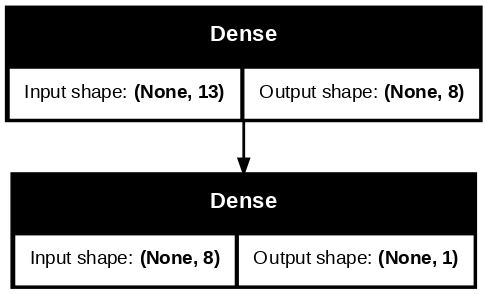

In [50]:
import tensorflow as tf

# 順序模型：類似搭積木一樣一層、一層放上去
# 用Sequential建立模型
model = tf.keras.Sequential()


# input資料
model.add(tf.keras.layers.Input(shape=(13,))) # 傳入13個特徵


# input為13個特徵，output為8個神經元。
# 用relu來收斂
model.add(tf.keras.layers.Dense(8, activation='relu'))

# 輸出1個神經元
model.add(tf.keras.layers.Dense(1))



# 查看模型結構
model.summary()

# 顯示模型
tf.keras.utils.plot_model(model,show_shapes=True,dpi=100) # show_shapes:是否顯示形狀資訊 dpi:圖示大小

In [51]:
# 編譯，設定
# model每層定義好後需經過compile
# optimizer(優化工具)為adam
# loss(損失函數)為keras.losses.mean_squared_error
# Metrics(評估標準)['mae', 'mse']表示我們希望在訓練過程中同時計算，平均絕對誤差(Mean Absolute Error，MAE）和均方誤差（Mean Squared Error，MSE）這兩個指標。
model.compile(optimizer = 'adam',
 loss = 'mse',
 metrics=['mae','mse']
)


# 訓練網絡用fit
# X_train去跟y_train比，全部資料跑70次
# verbose：日誌顯示，0為不在標準輸出流輸出日誌訊息，1為輸出進度條記錄，2為每個epoch輸出一行記錄
# validation_split：0~1之間的浮點數，用來指定訓練集的一定比例資料作為驗證集。
# 請注意:
# 模型的fit函數有兩個參數，shuffle用於將資料打亂，validation_split用於在沒有提供驗證集的時候，以一定比例從訓練集中取出一部分作為驗證集
# 這裡有個陷阱是，程式是先執行validation_split，再執行shuffle的，所以會出現這種情況：
# 假如你的訓練集是有序的，比方說正樣本在前負樣本在後，又設定了validation_split，那麼你的驗證集中很可能將全部是負樣本
# 同樣的，這個東西不會有任何錯誤報出來，因為Keras不可能知道你的數據有沒有經過shuffle，保險起見如果你的數據是沒shuffle過的，最好手動shuffle一下

history = model.fit(X_train, y_train,validation_split=0.25,batch_size=16,epochs = 70)

Epoch 1/70
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 400.8272 - mae: 19.7835 - mse: 400.8272 - val_loss: 644.4011 - val_mae: 25.3430 - val_mse: 644.4011
Epoch 2/70
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 366.4960 - mae: 18.8359 - mse: 366.4960 - val_loss: 625.8677 - val_mae: 24.9745 - val_mse: 625.8677
Epoch 3/70
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 357.2466 - mae: 18.6277 - mse: 357.2466 - val_loss: 609.4122 - val_mae: 24.6431 - val_mse: 609.4122
Epoch 4/70
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 341.4007 - mae: 18.1568 - mse: 341.4007 - val_loss: 594.3666 - val_mae: 24.3361 - val_mse: 594.3666
Epoch 5/70
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 328.9484 - mae: 17.8069 - mse: 328.9484 - val_loss: 579.4500 - val_mae: 24.0277 - val_mse: 579.4500
Epoch 6/70
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 320.1047 - mae: 17.5692 - mse: 320.1047 - val_loss: 563.8206 - val_mae: 23.7000 - val_mse: 563.8206
Epoch 7/70
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

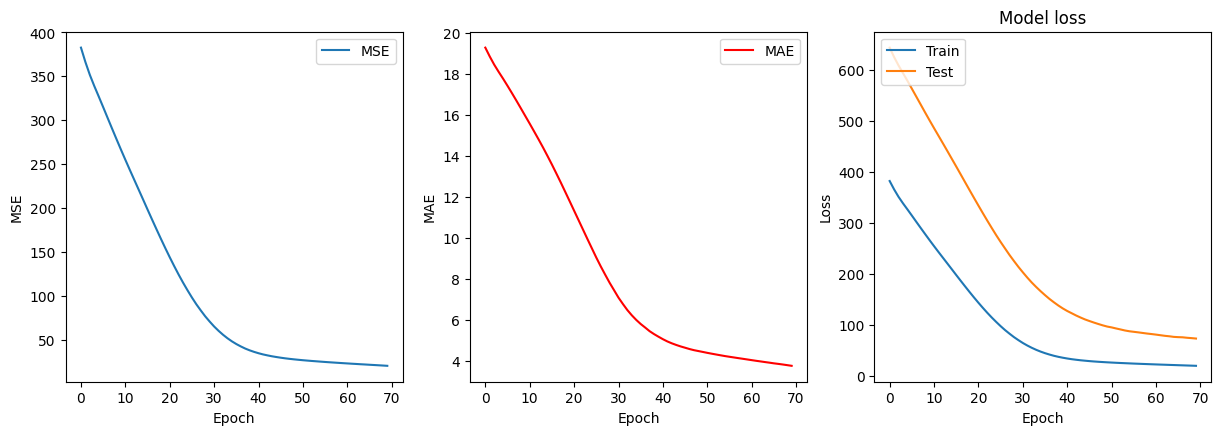

In [52]:
# 設定epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch


# 畫出各種圖
import matplotlib.pyplot as plt

# 畫出mse,mae
def plot_history(hist):

    # figsize是圖形寬度和高度的元組
    plt.figure(figsize=(20,10))

    # .subplot(長(比例), 寬(比例), 繪圖位置參數)
    plt.subplot(2, 4, 1)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    # .plot(x，y，基本線條屬性)
    plt.plot(hist['epoch'], hist['mse'],
           label='MSE')

    # 給圖像加圖例
    plt.legend()

    plt.subplot(2, 4, 2)
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.plot(hist['epoch'], hist['mae'],
           label = 'MAE',color ='red')
    plt.legend()

# 執行plot_history()，並丟入參數hist
plot_history(hist)


# 畫出Train,Test
# 繪製訓練 & 驗證的損失值
plt.subplot(2, 4, 3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

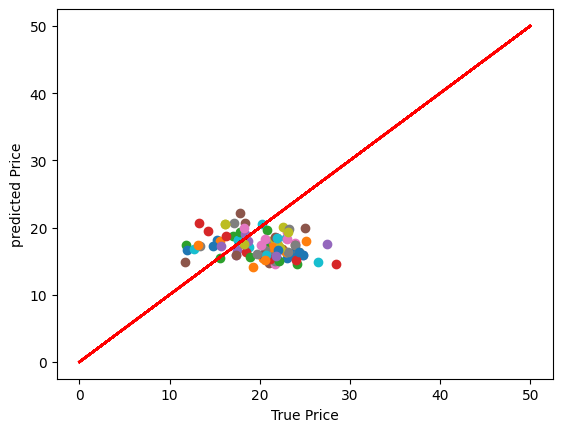

In [53]:
# 圖形化實際與預測

# np.random.choice(從哪個範圍，取幾個)
# 隨機取全部資料的100個編號
indices = np.random.choice(len(X_train), size=100)

count = 0
for n in indices:
    count += 1

    # 把隨機取出的編號的X_train值取出來
    x_t = X_train[n]

    # 用reshape()把數組轉成模型可以輸入的np樣式
    x_t_1 = x_t.reshape(1,13)

    # 用模型進行預測
    predict = model.predict(x_t_1)

    # 把隨機取出的編號的正確答案值取出來
    target = y_train[n]

    # 繪製散布圖
    plt.scatter(target,predict)

    # 由於target比predict為1:1時代表目標與預測相同，所以繪製一條45度線
    # .plot()第一個參數是放x座標的起點到終點，第二個參數是放y座標的起點和終點，第三個參數是放線條的顏色
    plt.plot([0,50],[0,50],'r')
    plt.xlabel('True Price')
    plt.ylabel('predicted Price')
plt.show()

In [54]:
# 查看訓練效果

# 從中隨機提取20個數據的編號
indices = np.random.choice(len(X_train), size=20)

count = 0

for n in indices:
    count += 1
    x_t = X_train[n]
    x_t_1 = x_t.reshape(1,13)
    predict = model.predict(x_t_1)
    print("——第%d個數據——" % count)
    print("預測值：%f" % predict[0][0]) # 多維數組取值
    target = y_train[n]
    print("標籤值：%f" % target[0]) # 多維數組取值
    print('\n')




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
——第1個數據——
預測值：19.452320
標籤值：19.200000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
——第2個數據——
預測值：19.452320
標籤值：19.200000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
——第3個數據——
預測值：15.586944
標籤值：24.500000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
——第4個數據——
預測值：16.627413
標籤值：20.600000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
——第5個數據——
預測值：16.491922
標籤值：22.000000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
——第6個數據——
預測值：15.305233
標籤值：26.600000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
——第7個數據——
預測值：18.254663
標籤值：25.000000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
——第8個數據——
預測值：20.136646
標籤值：22.600000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
——第9個數據——
預測值：16.670246
標籤值：13.900000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
——第10個數據——
預測值：18.397242
標籤值：18.500000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
——第11個數據——
預測值：18.802666
標籤值：17.000000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
——第12個數據——
預測值：13.903986
標籤值：26.600000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
——第13個數據——
預測值：18.24672

# 1.讀取資料

In [55]:
# test資料來源
df_test_url = 'https://raw.githubusercontent.com/micrighost/KaggleNotes_BostonHousePrices_ANN/main/boston_raw_data/Boston_test.csv'

df_test = pd.read_csv(df_test_url)

df_test.head(10)

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS?,RAD,TAX,PTRATIO,B 1000,LSTAT
0,306,0.05479,33.0,2.18,0,0.472,6.616,58.1,3.3700,7,222,18.4,393.36,8.93
1,291,0.03502,80.0,4.95,0,0.411,6.861,27.9,5.1167,4,245,19.2,396.90,3.33
2,296,0.12932,0.0,13.92,0,0.437,6.678,31.1,5.9604,4,289,16.0,396.90,6.27
3,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
4,90,0.05302,0.0,3.41,0,0.489,7.079,63.1,3.4145,2,270,17.8,396.06,5.70
5,218,0.07013,0.0,13.89,0,0.550,6.642,85.1,3.4211,5,276,16.4,392.78,9.69
6,235,0.44791,0.0,6.20,1,0.507,6.726,66.5,3.6519,8,307,17.4,360.20,8.05
7,300,0.05561,70.0,2.24,0,0.400,7.041,10.0,7.8278,5,358,14.8,371.58,4.74
8,195,0.01439,60.0,2.93,0,0.401,6.604,18.8,6.2196,1,265,15.6,376.70,4.38
9,279,0.07978,40.0,6.41,0,0.447,6.482,32.1,4.1403,4,254,17.6,396.90,7.19


# 2.數據清洗

In [56]:
# 用Pandas中的info()函數，顯示有​​關DataFrame的信息，包括索引的資料類型dtype和列的資料類型dtype，非空值的數量和記憶體使用情況。
df_test.info()

# 初步資訊:沒有缺值真棒

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       100 non-null    int64  
 1   CRIM     100 non-null    float64
 2   ZN       100 non-null    float64
 3   INDUS    100 non-null    float64
 4   CHAS     100 non-null    int64  
 5   NOX      100 non-null    float64
 6   RM       100 non-null    float64
 7   AGE      100 non-null    float64
 8   DIS?     100 non-null    float64
 9   RAD      100 non-null    int64  
 10  TAX      100 non-null    int64  
 11  PTRATIO  100 non-null    float64
 12  B 1000   100 non-null    float64
 13  LSTAT    100 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 11.1 KB


# 3.特徵工程

In [57]:
# 傳統機器學習：利用特徵工程(feature engineering)，人為對資料進行提煉清洗；
# 深度學習：利用表示學習(representation learning)，機器學習模型本身對資料進行特徵精煉

# 4.相關性分析

In [58]:
# 參照訓練集時的操作，雖然CHAS相關性有點低，但因為是用ANN所以不人工刪除特徵

# 5.訓練模型

In [59]:
# 將資料從 DataFrame 轉為 numpy.Array。
# 從資料中提取X_test(特徵)

# 行從0位置開始取值到最後(空白代表到底)，列從1位置開始取值到最後
X_test = df_test.values[0:,1:]


# 查看特徵的形狀
X_test.shape

(100, 13)

In [60]:
# 資料歸一化（最大最小方法）
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_test)           # 訓練
X_test = scaler.transform(X_test)



# # 資料標準化（標準化方法）
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_test)
# X_test = scaler.transform(X_test)

In [61]:
# 進行預測
predict = model.predict(X_test)

# 顯示前五個預測值
predict[:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[16.323631],
       [17.440294],
       [15.489416],
       [15.493433],
       [15.928435]], dtype=float32)

In [62]:
# 導出預測結果
test_ann_predict = pd.DataFrame()
test_ann_predict['ID'] = df_test['ID']
test_ann_predict['PRICE'] = predict

# 顯示預測結果
test_ann_predict

,ID,PRICE
0,306,16.323631
1,291,17.440294
2,296,15.489416
3,6,15.493433
4,90,15.928435
...,...,...
95,369,17.670040
96,370,21.177462
97,371,22.668177
98,372,18.906450


In [63]:
# 將預測結果導出為csv文件
test_ann_predict.to_csv('./BostonHousePrices_ANN.csv',index=False)